<a href="https://colab.research.google.com/github/RaianaSeixas/Portifolio/blob/main/Python_for_Finance/07_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Portfolio optimization is the technique of allocating assets so that it has the maximum return and minimum risk.

This can be done by finding the allocation that results in the **maximum Sharpe ratio**. 

The simplest way to find the best allocation is to check many random allocations and find the one that has the best Sharpe ratio. This process of randomly guessing is known as a **Monte Carlo Simulation**.

In [8]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = [12, 6] # mudar área dos gráficos # changing graphic area

In [10]:
# Potfolio Definition

stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
start='2018-01-01'

data = yf.download(stocks, start=start)

#daily returns
data = data['Close']
x = data.pct_change()
x.iloc[0]=0 #initial return =0

#print(x)

[*********************100%***********************]  4 of 4 completed


In [11]:
'''
We need to store the weights, returns and Sharpe ratios for each portfolio we will be checking so that we can then find the one that is best.
We will define lists to store these values for each portfolio.
'''
p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

In [12]:
'''
This for loop, generates the random weights and calculate the returns, volatility and Sharpe ratio of the portfolio.
'''
count = 500
for k in range(0, count):
    wts = np.random.uniform(size = len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    #returns
    mean_ret = (x.mean() * wts).sum()*252
    p_returns.append(mean_ret)

    #volatility
    ret = (x * wts).sum(axis = 1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
    #Sharpe ratio
    sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)

'''We now have the metrics for 500 portfolios! '''

'We now have the metrics for 500 portfolios! '

In [13]:
'''
Let's find the index of the portfolio with the maximum Sharpe ratio using the Numpy argmax() function and output the max Sharpe ratio and the weights:
'''
count = 500
for k in range(0, count):
    wts = np.random.uniform(size = len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    #returns
    mean_ret = (x.mean() * wts).sum()*252
    p_returns.append(mean_ret)

    #volatility (annual)
    ret = (x * wts).sum(axis = 1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
    #Sharpe ratio
    sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)


max_ind = np.argmax(p_sharpe)

print('This is the portfolio which results in the maximum Sharpe ratio among all tested.')
print('You may get slightly different results each time you run the code, as the weights are randomly generated every time.')
print()

#Max Sharpe ratio
print('Sharpe ratio:',p_sharpe[max_ind])

#weights
print('Weights:',p_weights[max_ind])

This is the portfolio which results in the maximum Sharpe ratio among all tested.
You may get slightly different results each time you run the code, as the weights are randomly generated every time.

Sharpe ratio: 1.2883869812169766
Weights: [0.26066031 0.0028398  0.37929812 0.35720177]


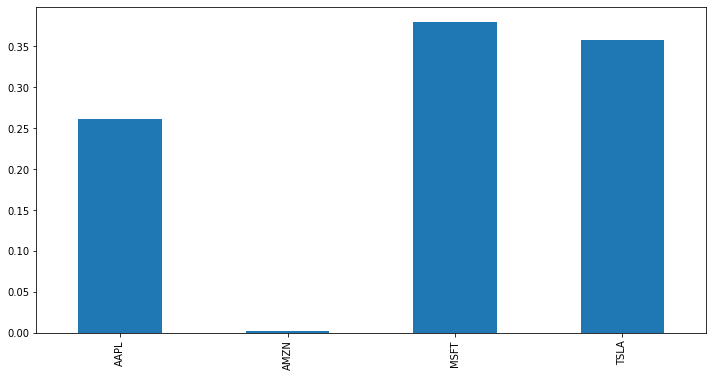

In [14]:
'''
Let's draw a bar chart visualizing the weights:
'''
s = pd.Series(p_weights[max_ind], index=x.columns)
s.plot(kind='bar')

plt.savefig('plot.png')

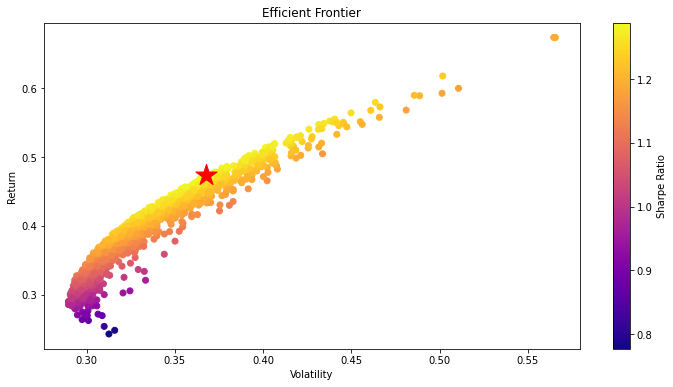

The red star marker to the chart, shows the most efficient portfolio with the best Sharpe ratio


In [15]:
'''
As a last step, let's plot information about the 500 portfolios.
The chart is called Efficient Frontier and shows the returns on the Y-axis and volatility on the X-axis.
The Efficient Frontier chart shows the return we can get for the given volatility, or, the volatility that we get for a certain return.

We can create the chart using the scatter() function, providing the volatility and return lists as parameters:
'''

plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500)
plt.show()

plt.show()

print('The red star marker to the chart, shows the most efficient portfolio with the best Sharpe ratio')